<a href="https://colab.research.google.com/github/veersubandh/DS1002-S24/blob/main/Assignments/06_Pandas_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas exercises 1

1. Import dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

---

In [ ]:
list = [98, 24, 46, 87, 33]

2. Convert `list` to a pandas series using `pd.Series`

In [ ]:
series= pd.Series(list)
print(series)

0    98
1    24
2    46
3    87
4    33
dtype: int64


3. Take the above series and add an index that starts at 2 and steps by 3

In [ ]:
series= pd.Series(list, index=range(2,len(list) *3+2, 3))
print(series)

2     98
5     24
8     46
11    87
14    33
dtype: int64


4. Create a dictionary of 4 names, ages, and careers   
Convert this dictionary to a pandas dataframe: `df`.  
Print the dataframe.

In [ ]:
my_dict = {
    "names": ["anaya", "ayaan", "amisha", "pronit"],
    "ages": ["17", "19", "20", "22"],
    "careers": ["data science", "finance", "marketing", "architecture"]
}

print(my_dict)
df = pd.DataFrame(my_dict)

# Print the DataFrame
print(df)


{'names': ['anaya', 'ayaan', 'amisha', 'pronit'], 'ages': ['17', '19', '20', '22'], 'careers': ['data science', 'finance', 'marketing', 'architecture']}
    names ages       careers
0   anaya   17  data science
1   ayaan   19       finance
2  amisha   20     marketing
3  pronit   22  architecture


5. Name the index of `df` 'participant_id'.  
Print `df`.

In [ ]:
df.index.name = 'participant_id'
print(df)

                 names ages       careers
participant_id                           
0                anaya   17  data science
1                ayaan   19       finance
2               amisha   20     marketing
3               pronit   22  architecture


6. Use a pandas function to determine the data types of the columns of `df`.

In [ ]:
print(df.dtypes)

names      object
ages       object
careers    object
dtype: object


7. Using bracket notation, reference column `name`

In [ ]:
#using integer based indexing, I will print the data types of the columns
print(df.iloc[1].dtypes)

object


8. Using dot notation, reference column `name`

In [ ]:
print(df.names.dtype)

object


8. Reference column `name` and have it returned in a dataframe.

In [ ]:
column_name = 'names'
column_df = df[[column_name]]
print(column_df)

                 names
participant_id        
0                anaya
1                ayaan
2               amisha
3               pronit


9. Show the 3rd element in column `career`.

In [ ]:
third_element_career = df['careers'].iloc[2]
print(third_element_career)

marketing


10.  Load the `iris` dataset that we used in class.  Use `iris` as the name of your data frame.

In [ ]:
iris = sns.load_dataset('iris')
df=iris
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


11.  What is the correlation between the variables `sepal_length` and `sepal_width` for all the irises?

In [ ]:
iris[['sepal_length','sepal_width']].corr()

,sepal_length,sepal_width
sepal_length,1.00000,-0.11757
sepal_width,-0.11757,1.00000


12.  Which of the three species has the highest correlation between `sepal_length` and `sepal_width`?  Show any calculations you use to support your answer.

In [ ]:
#to find the species with the highest correlation, first I will calculate the correlation between
#the two parameters sepal_length and sepal_width for each species
correlation_by_species = df.groupby('species').apply(lambda x: x['sepal_length'].corr(x['sepal_width']))
#lambda is used in conjunction with apply to calculate the correlation for each species; x is each parameter
species_with_highest_correlation = correlation_by_species.idxmax()
print("Species with the highest correlation:", species_with_highest_correlation)

Species with the highest correlation: setosa


13.  Among the four variables, the two that are most negatively correlated (overall) are `sepal_width` and `petal_length`.  (How do we know this?)  Determine the same thing but for each species separately:  for each species, which two variables have the most negative (or the least positive) correlation?  Again, include calculations to support your answer.

In [ ]:
#finding a correlation matrix
correlation_matrix=df.corr()
#proving sepal_width and petak_length are the most negatively correlated pair
most_negatively_correlated= correlation_matrix.unstack().sort_values().head(1)
print("Most negatively correlated pair:", most_negatively_correlated)
#determining most negatively correlated variables within each species
#defining variables of interest
variables=['petal_length','sepal_length','petal_width', 'sepal_width']
#grouping by each species and calculating correlation for each pair of variables
# Defining variables of interest
variables = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width']

# Determining the most negatively correlated variables within each species
#first, I will do this for species virginica
# Filter the DataFrame for species 'virginica'
virginica_data = df[df['species'] == 'virginica']

# Calculate the correlation matrix for 'virginica' species
correlation_matrix_virginica = virginica_data.corr()
# Extract the lower triangle of the correlation matrix
lower_triangle_virginica = correlation_matrix_virginica.mask(np.triu(np.ones(correlation_matrix_virginica.shape), k=1).astype(bool))


# Find the pair with the lowest correlation coefficient
most_negatively_correlated_variables = lower_triangle_virginica.stack().idxmin()

print("Two variables with the most negative correlation within species 'virginica':", most_negatively_correlated_variables)

#next, I will do this for species setosa
# Filter the DataFrame for species 'setosa'
setosa_data = df[df['species'] == 'setosa']

# Calculate the correlation matrix for 'setosa' species
correlation_matrix_setosa = setosa_data.corr()

# Extract the lower triangle of the correlation matrix
lower_triangle_setosa = correlation_matrix_setosa.mask(np.triu(np.ones(correlation_matrix_setosa.shape), k=1).astype(bool))

# Find the pair with the lowest correlation coefficient
most_negatively_correlated_variables = lower_triangle_setosa.stack().idxmin()

print("Two variables with the most negative correlation within species 'setosa':", most_negatively_correlated_variables)

Most negatively correlated pair: sepal_width  petal_length   -0.42844
dtype: float64
Two variables with the most negative correlation within species 'virginica': ('petal_width', 'sepal_length')
Two variables with the most negative correlation within species 'setosa': ('petal_length', 'sepal_width')


<ipython-input-16-b4695696f8ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()
<ipython-input-16-b4695696f8ca>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_virginica = virginica_data.corr()
<ipython-input-16-b4695696f8ca>:34: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_setosa = setosa_data.corr()


14.  Once again, the variables `sepal_width` and `petal_length` are negatively correlated.  But for each individual species, these two variables are positively correlated.  How is this possible?  Explain this phenomenon.  Use a data visualization if it helps.


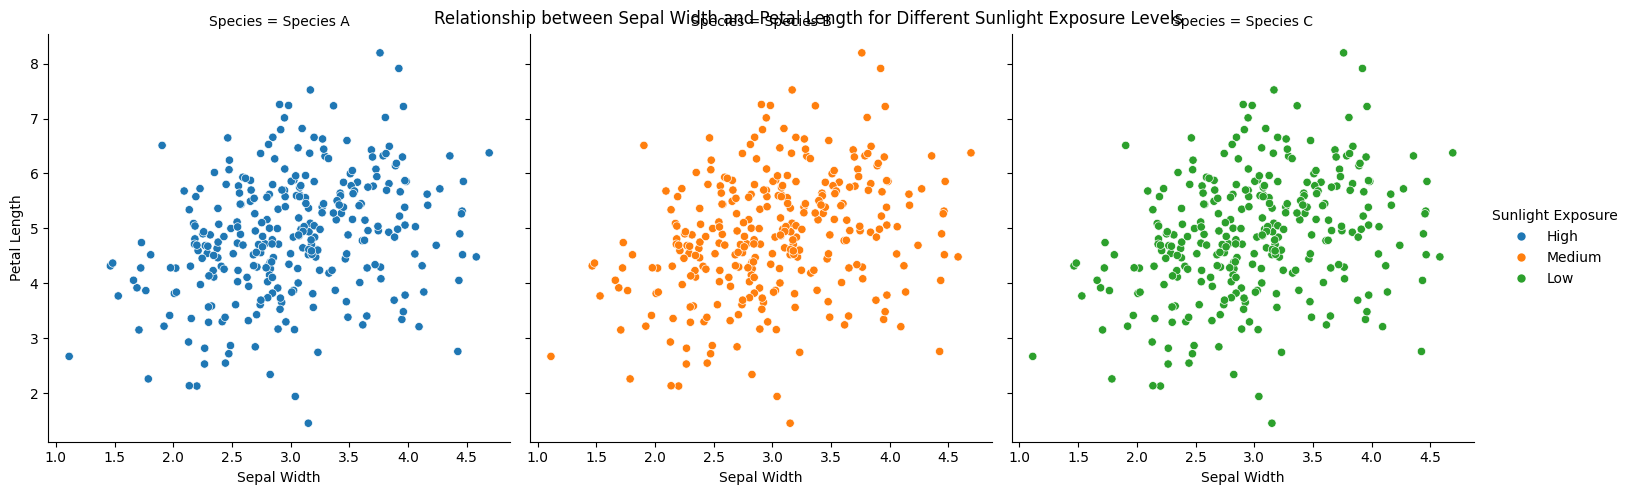

In [ ]:
#unfortunately, the results in q13 don't match the assumption in q14 as for the setosa species, petal length and sepal width are negatively correlated
#however, for the virginica species, they seem to be positively correlated
#a possible reason for this could be the presence of an unaccounted confounding variable that can alter the results by affecting the factors being studied
#for instance, from my biology learnings I derive that exposure to sunlight could be a possible confounding variable as flowers need sunlight to photosynthesize
#which facilitates their growth and development and can hence, influence both sepal width and petal length.
#In this situatuation, if species with a preference for full sunlight tend to have wider sepals and longer petals, and species preferring shade tend to have narrower sepals and shorter petals
#it could lead to a positive correlation between sepal width and petal length within each species.
#However, when considering all species together, the cumulative correlation between these variables may appear negative due to the
#differences in sunlight preferences among species.

#visualising this data set to consider sunlight exposure as a confounding variable
# Generate synthetic data for 3 species A, B, and C  at different sunlight exposure levels
# Generate synthetic data for sepal width and petal length for each species and sunlight exposure level
np.random.seed(0)  # For reproducibility

n_samples = 100

# Generate data for each species at different sunlight exposure levels
data = pd.DataFrame({
    'Species': np.repeat(['Species A', 'Species B', 'Species C'], 3 * n_samples),
    'Sepal Width': np.tile(np.concatenate([
        np.random.normal(loc=3, scale=0.5, size=n_samples),  # High sunlight exposure
        np.random.normal(loc=3.5, scale=0.5, size=n_samples),  # Medium sunlight exposure
        np.random.normal(loc=2.5, scale=0.5, size=n_samples),  # Low sunlight exposure
    ]), 3),
    'Petal Length': np.tile(np.concatenate([
        np.random.normal(loc=5, scale=1, size=n_samples),  # High sunlight exposure
        np.random.normal(loc=5.5, scale=1, size=n_samples),  # Medium sunlight exposure
        np.random.normal(loc=4.5, scale=1, size=n_samples),  # Low sunlight exposure
    ]), 3),
    'Sunlight Exposure': np.repeat(['High', 'Medium', 'Low'], 3 * n_samples)
})

# Plot the relationship between sepal width and petal length for each species at different sunlight exposure levels
sns.relplot(data=data, x='Sepal Width', y='Petal Length', hue='Sunlight Exposure', col='Species', kind='scatter')
plt.suptitle('Relationship between Sepal Width and Petal Length for Different Sunlight Exposure Levels')
plt.show()
